In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unidecode
import re
import gensim.corpora as corpora
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
import logging
from gensim.models.wrappers import LdaMallet
import scikits.bootstrap as bootstrap
from tqdm import tqdm

In [4]:
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
logging.root.level = logging.INFO
stop_words = set(stopwords.words('dutch'))

In [5]:
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
class MyCorpus(object):
            def __iter__(self):
                length = 0
                for text in texts:
                    yield dictionary.doc2bow(text)
                    length += 1
                self.length = length
            def __len__(self):
                return self.length


def remove_stopwords(texts):
    '''
    remove accents and increase max length of words
    Dutch has longer words than English
    '''
    return ' '.join(word for word in simple_preprocess(str(texts), max_len=17) if word not in stop_words)

In [325]:
import glob
import os

bigFile = []
#path = '../../newspapers/{}'.format(title)
#print(path)
allFiles = glob.glob('../../datasets/17e_krant/RAW/*.csv')
for f in tqdm(allFiles):
    print(os.path.basename(f))
    df = pd.read_csv(f, delimiter=',')
    df.columns=['a','b', 'c', 'newspaper', 'date','id','type','ocr']
    df = df[~df['date'].str.contains('date')]  # remove double headers
    df = df[~df['ocr'].astype(str).str.contains(
        'objecttype')]  # remove double headers
    #df = df[df['page'].astype(int) <= int(10)]
    #regex_pat = re.compile(r'[^a-zA-Z\s]', flags=re.IGNORECASE)
    #df['date'] = df['date'].astype('datetime64[ns]')  # set dates as dates
    #df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
    #df = df.sort_values(by='date')  # sort the dateframe by date
    #df.index = df['date']  # set index as dates
    bigFile.append(df)
bigFile = pd.concat(bigFile)






  0%|          | 0/4 [00:00<?, ?it/s]

kranten4.csv







 25%|██▌       | 1/4 [00:00<00:01,  2.45it/s]




 50%|█████     | 2/4 [00:00<00:00,  3.08it/s]

kranten1.csv
kranten2.csv







 75%|███████▌  | 3/4 [00:00<00:00,  3.20it/s]

kranten3.csv







100%|██████████| 4/4 [00:01<00:00,  3.38it/s]






In [333]:
df = bigFile.sort_values(by='date')

In [4]:
df = pd.read_csv('data/TVG/tvg.csv', delimiter=',')

In [5]:
df = df[~df['author'].isnull()]

In [6]:
df['documents'] = df['documents'].astype(str)

In [7]:
df = df.groupby(['year', 'title'], as_index=False)\
         .agg({'documents' : ' '.join, 'volume' : 'first'})  


In [8]:
df.sort_values('volume', inplace=True)

In [9]:
df['len'] = df['documents'].str.split().apply(len)

In [10]:
df['ocr'] = df['documents']

In [11]:
df['page'] = 1

In [12]:
df['date'] = df['year']

In [12]:
#df['ocr'] = df['ocr'].apply(lambda x: unidecode.unidecode(x))

In [334]:
regex_pat = re.compile(r'[^a-zA-Z\s]', flags=re.IGNORECASE)
df['ocr'] = df['ocr'].str.replace(regex_pat, '')
df['ocr'] = df['ocr'].str.findall(r'\w{3,}').str.join(' ')
df['len'] = df['ocr'].astype(str).str.split().apply(len)
df['ocr'] = df['ocr'].astype(str).str.lower()

In [14]:
df['date'] = df['date'].astype('datetime64[ns]')  # set dates as dates
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df = df.sort_values(by='date')  # sort the dateframe by date

df.index = df['date']  # set index as dates

In [15]:
df['ocr'] = df['ocr'].apply(lambda x: remove_stopwords(x))

In [228]:
#df.to_csv('17c_news.csv', index=False, sep='\t')
df = pd.read_csv('17c_news.csv', delimiter='\t')

In [25]:
data = df['ocr'].values

In [26]:
data = [d.split() for d in data]

In [32]:
dictionary = corpora.Dictionary(data)

INFO : adding document #0 to Dictionary(0 unique tokens: [])
INFO : built Dictionary(649728 unique tokens: ['aanbesteed', 'aanboden', 'aanbrachten', 'aanbraken', 'aangegrepen']...) from 2079 documents (total 9153905 corpus positions)


In [33]:
dictionary.filter_extremes(no_below=5, no_above=.80)

INFO : discarding 562589 tokens: [('aanbraken', 3), ('aanrandden', 1), ('aanstekers', 3), ('aardeiding', 1), ('absconce', 1), ('achtergevel', 3), ('afgereden', 1), ('afha', 2), ('alle', 1789), ('alleen', 1775)]...
INFO : keeping 87139 tokens which were in no less than 5 and no more than 1663 (=80.0%) documents
INFO : resulting dictionary: Dictionary(87139 unique tokens: ['aanbesteed', 'aanboden', 'aanbrachten', 'aangegrepen', 'aangelegd']...)


In [36]:
texts = data
corpus_ = MyCorpus()

In [ ]:
iterations=1000
num_topics=50
model = LdaMallet('~/mallet/mallet-2.0.8/bin/mallet', corpus=corpus_, id2word=dictionary, workers=1, iterations=iterations, num_topics=num_topics, optimize_interval=20)

INFO : serializing temporary corpus to /var/folders/wk/666h39wx0jn4wp63jpfqj7lh0000gn/T/32f56d_corpus.txt
INFO : converting temporary corpus to MALLET format with ~/mallet/mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /var/folders/wk/666h39wx0jn4wp63jpfqj7lh0000gn/T/32f56d_corpus.txt --output /var/folders/wk/666h39wx0jn4wp63jpfqj7lh0000gn/T/32f56d_corpus.mallet
INFO : training MALLET LDA with ~/mallet/mallet-2.0.8/bin/mallet train-topics --input /var/folders/wk/666h39wx0jn4wp63jpfqj7lh0000gn/T/32f56d_corpus.mallet --num-topics 50  --alpha 50 --optimize-interval 20 --num-threads 1 --output-state /var/folders/wk/666h39wx0jn4wp63jpfqj7lh0000gn/T/32f56d_state.mallet.gz --output-doc-topics /var/folders/wk/666h39wx0jn4wp63jpfqj7lh0000gn/T/32f56d_doctopics.txt --output-topic-keys /var/folders/wk/666h39wx0jn4wp63jpfqj7lh0000gn/T/32f56d_topickeys.txt --num-iterations 1000 --inferencer-filename /var/folders/wk/666h39wx0jn4wp63j

In [215]:
doc_topic = pd.read_pickle('../../17c_theta.pkl')
doc_topic.shape

(38765, 50)

In [7]:
df['date']

NameError: name 'df' is not defined

In [216]:
df = pd.read_csv('../event_flow/code/clean_tvg.csv', delimiter='\t')

In [217]:
df['year'] = df['year'].astype(str).apply(lambda x: x[:-2])

In [218]:
df['year'] = df['year'].astype('datetime64[ns]')  # set dates as dates
df['year'] = pd.to_datetime(df['year'], format='%Y')
df.index = df['year']

In [12]:
dates = df['date'].astype(str).apply(lambda x: x[:4]).values

In [13]:
with open('tvg_dates.txt', 'w') as f:
    for item in df['year'].dt.date:
        f.write("%s\n" % item)

KeyError: 'year'

In [14]:
dates = [int(x) for x in dates]
timeslices = []
counter = 0
date_list = []
start = 1618
jump = 3
date_list.append(start)
timeslices.append(0)
for i in dates:
    bin_ = range(start, start + jump)
    if i in bin_:
        counter += 1
    else:
        timeslices.append(counter) 
        date_list.append(i)
        start = i

In [70]:
dates = pd.read_csv('tvg_dates.txt', sep="\n", header=None)

In [15]:
dates.columns=['dates']
#dates.sort_values(by='dates', inplace=True)
dates['dates'] = pd.to_datetime(dates.dates, format='%Y-%m-%d')
years = list(set(dates['dates'].dt.year.values))
dates.index = dates['dates']
dates.shape

AttributeError: 'list' object has no attribute 'columns'

In [16]:
def make_timeslices(period):
    timeslices = []
    year = 0
    date_list = dates['dates'].groupby(pd.Grouper(freq=period)).first().dt.values
    for name, group in dates.groupby(pd.Grouper(freq=period)):
    #for name, group in df.groupby(pd.Grouper(freq=period)):
        timeslices.append(year)
        year += group.values.shape[0]
    timeslices.append(dates.shape[0])
    return date_list, timeslices

In [17]:
date_list, timeslices = make_timeslices('5Y')

TypeError: list indices must be integers or slices, not str

In [18]:
R_IJ_mu = []
R_IJ_sigma = []
M_mu = []
M_sigma = []
for t in tqdm(range(0, len(timeslices) -1)):
    #p_ij_ = []
    #Ri_ = []
    #R_ij_ = []
    M_ = []
    for iteration in range(0,1000):
        
        N = doc_topic[timeslices[t]:timeslices[t+1]].shape[0]

        random_indices = np.arange(0, doc_topic[timeslices[t]:timeslices[t+1]].shape[0])    # array of all indices
        np.random.shuffle(random_indices)                         # shuffle the array
        doc_topic_sample = doc_topic[timeslices[t]:timeslices[t+1]][random_indices[:100]]
        
        p_ij = doc_topic_sample[:,:,None] * doc_topic_sample[:,None,:]
        p_ij = p_ij.sum(axis=0) / p_ij.sum()
        pt_i = doc_topic_sample[:,].sum(axis=0)
        pt_i = pt_i / pt_i.sum()
        #R_ij = np.log2(p_ij / (pt_i * pt_i))
        R_ij = np.log2(p_ij / (np.outer(pt_i.ravel(), pt_i.ravel())))
        ptj_i = p_ij / pt_i
        Ri = (R_ij * ptj_i).sum(axis=0)
        M = (Ri * pt_i).sum(axis=0)  
        
        #p_ij_.append(p_ij)
        #Ri_.append(Ri)
        M_.append(M)
        #R_ij_.append(R_ij)
    M_mu.append(np.mean(M_))
    M_sigma.append(np.std(M_))

100%|██████████| 24/24 [00:17<00:00,  1.30it/s]


In [19]:
#dates_ = date_list.dt.year.values
dates_ = date_list

In [20]:
yerr = M_sigma
ylower = np.maximum(1e-2, np.array(M_mu) - np.array(yerr))
yerr_lower = M_mu - ylower

In [21]:
dates_

[1618,
 1621,
 1624,
 1628,
 1631,
 1634,
 1637,
 1640,
 1643,
 1646,
 1649,
 1652,
 1655,
 1658,
 1661,
 1664,
 1667,
 1670,
 1673,
 1676,
 1679,
 1682,
 1685,
 1688,
 1691]

In [23]:
fig = plt.figure()

<Figure size 1440x720 with 0 Axes>

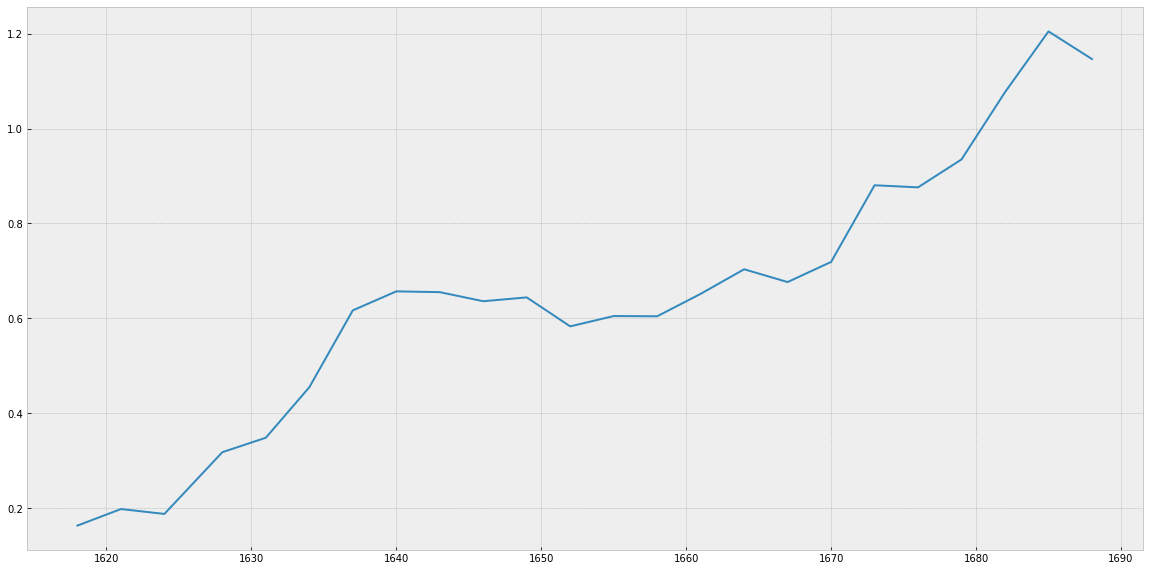

In [25]:
plt.plot(dates_[:-1], M_mu)

In [26]:
fig.savefig('test.png')

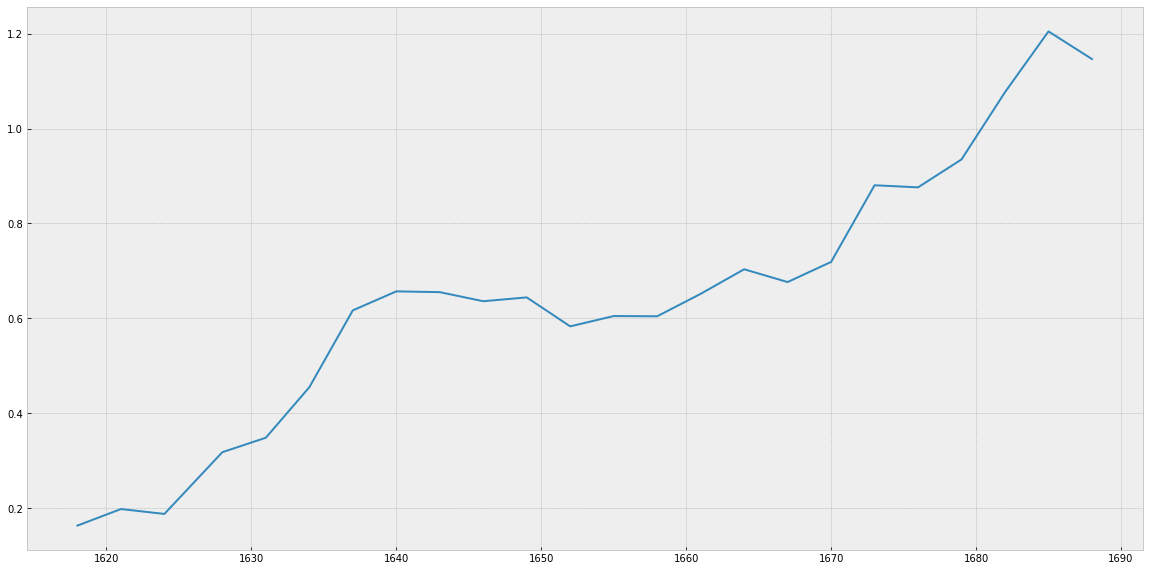

In [22]:
plt.plot(dates_[:-1], M_mu)

In [ ]:
#plt.plot(M_mu)
plt.errorbar(y = M_mu, x=dates_[:-1], yerr=[np.array(yerr_lower), 2*np.array(yerr)], ecolor='g', capthick=10)
plt.locator_params(axis='x', nbins=10)
plt.savefig('Dutch-17C.png')

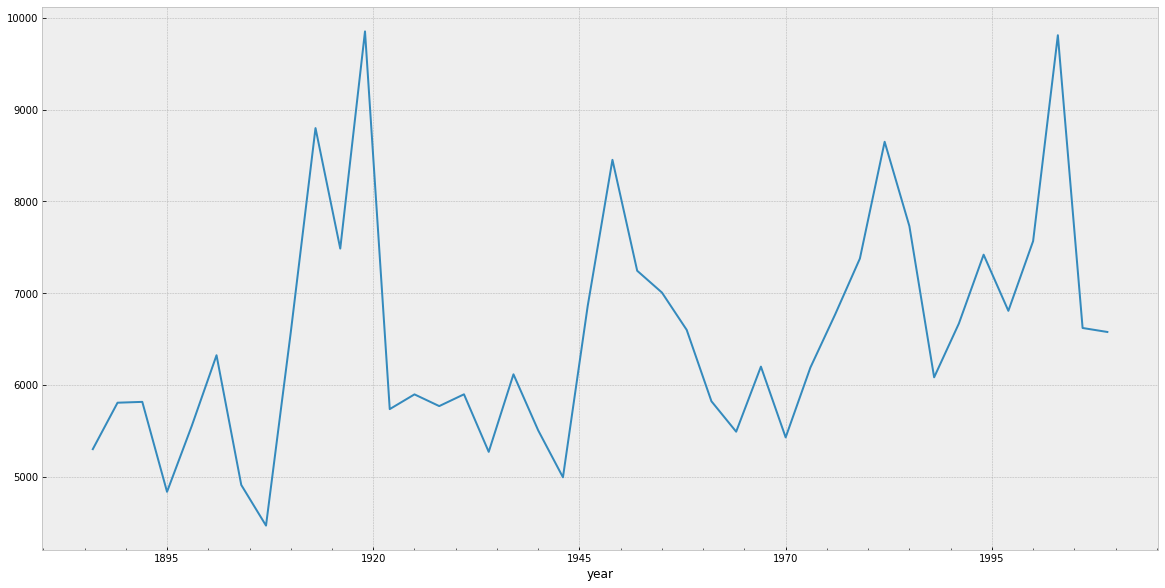

In [310]:
df['len'].resample('3Y').mean().plot()

In [118]:
doc_topic.shape

(38765, 50)

In [159]:
window_range = [2,3,4,5, 10]

In [160]:
window_range.sort(key=int)

In [161]:
window_range[-1]

10

In [227]:
doc_topic.shape

(38765, 50)

In [200]:
from scipy.stats import entropy
import numpy as np
import tqdm
from itertools import chain

In [261]:
%%time

novelty = np.array([[np.mean([entropy(doc_topic[i], doc_topic[i - b]) for b in range(0,window)]) for window in window_range] for i in range(window_range[-1], doc_topic.shape[0] - window_range[-1])])
#dates = np.array([[df.iloc[i]['date'] for window in window_range] for i in range(window_range[-1], doc_topic.shape[0])])
transience = np.array([[np.mean([entropy(doc_topic[i], doc_topic[i + b]) for b in range(0,window)]) for window in window_range] for i in range(window_range[-1], (doc_topic.shape[0] - window_range[-1]))])
resonance = novelty - transience

CPU times: user 41.3 s, sys: 67.6 ms, total: 41.3 s
Wall time: 41.4 s


In [282]:
i = 100
for j in range(-10, 10):
    if j > 0:
        i1 = i + j
        i2 = i
    else:
        i1 = i
        i2 = i + j
        
jump_entropy = [np.mean(entropy(doc_topic[i1 + d], doc_topic[i2 + d]) for d in range(-14, 14))]

TypeError: unsupported operand type(s) for /: 'generator' and 'int'

In [279]:
i2

10

In [ ]:
[x+1 if x >= 45 else x+5 for x in l]
[27, 18, 46, 51, 99, 70, 48, 49, 6]